In [16]:
import os
from entsoe import EntsoePandasClient
import pandas as pd
import datetime as dt
import pytz
from dateutil.relativedelta import *
from matplotlib import pyplot as plt
import rivapy.user_settings
#client = EntsoePandasClient(api_key=rivapy.user_settings.entsoe_api_key)

#start = pd.Timestamp('20220101', tz='Europe/Berlin')
#end = pd.Timestamp.today(tz='Europe/Berlin').round('D')
#country_code = 'DE_LU'

#spot = pd.DataFrame(client.query_day_ahead_prices(country_code, start=start, end=end))
#spot.index = [x.replace(tzinfo=pytz.UTC) for x in spot.index]
#spot.columns = ['Spot']

#demand = pd.DataFrame(client.query_load_forecast(country_code=country_code, start=start, end=end))
#demand.columns = ['Demand']
#demand = demand.assign(Datetime=[demand.index[x].replace(minute=0) for x in range(demand.shape[0])])
#demand = demand.groupby(['Datetime']).mean()
#demand.index = [x.replace(tzinfo=pytz.UTC) for x in demand.index]
#demand = demand.loc[demand.Demand <= 100000,:]

#wind_solar = client.query_wind_and_solar_forecast(country_code=country_code, start=start, end=end, psr_type=None)
#wind_solar = wind_solar.assign(Datetime=[wind_solar.index[x].replace(minute=0) for x in range(wind_solar.shape[0])])
#wind_solar = wind_solar.groupby(['Datetime']).mean()
#wind_solar = wind_solar.assign(Wind=wind_solar['Wind Offshore'] + wind_solar['Wind Onshore']).drop(['Wind Offshore', 'Wind Onshore'], axis=1)
#wind_solar.index = [x.replace(tzinfo=pytz.UTC) for x in wind_solar.index]

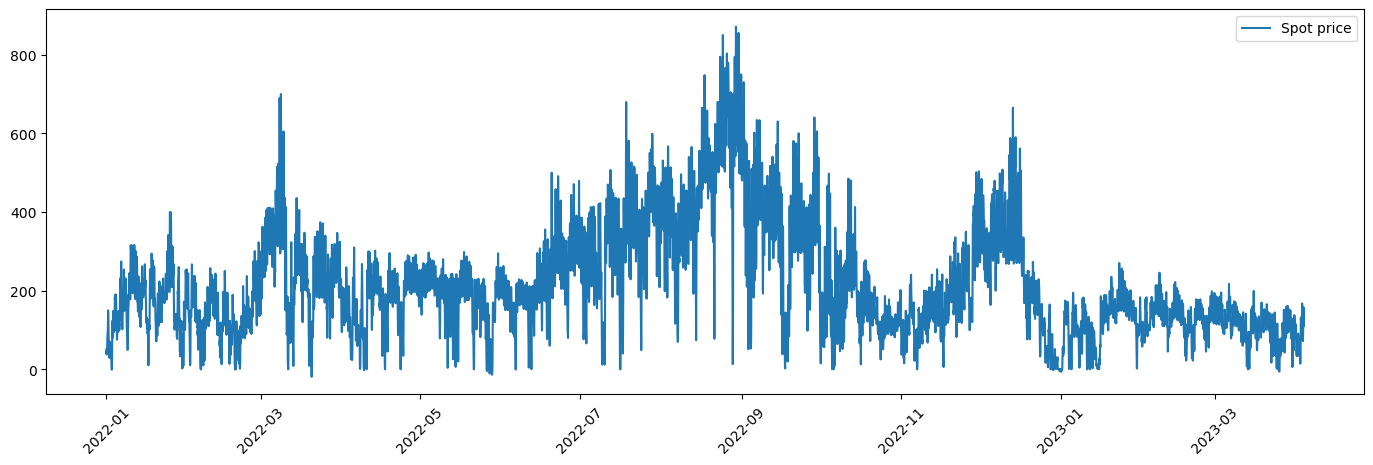

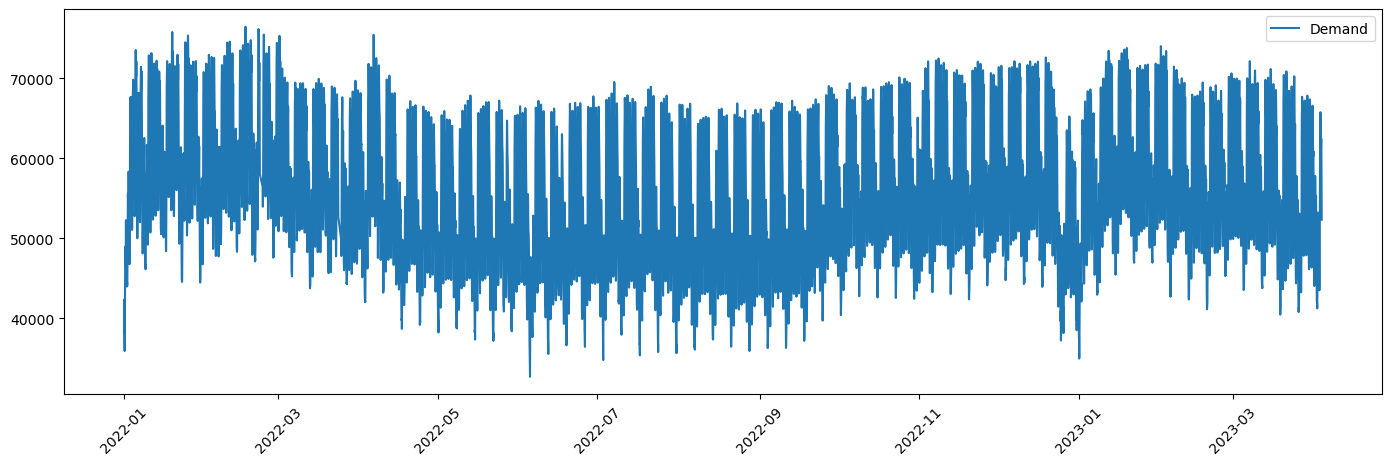

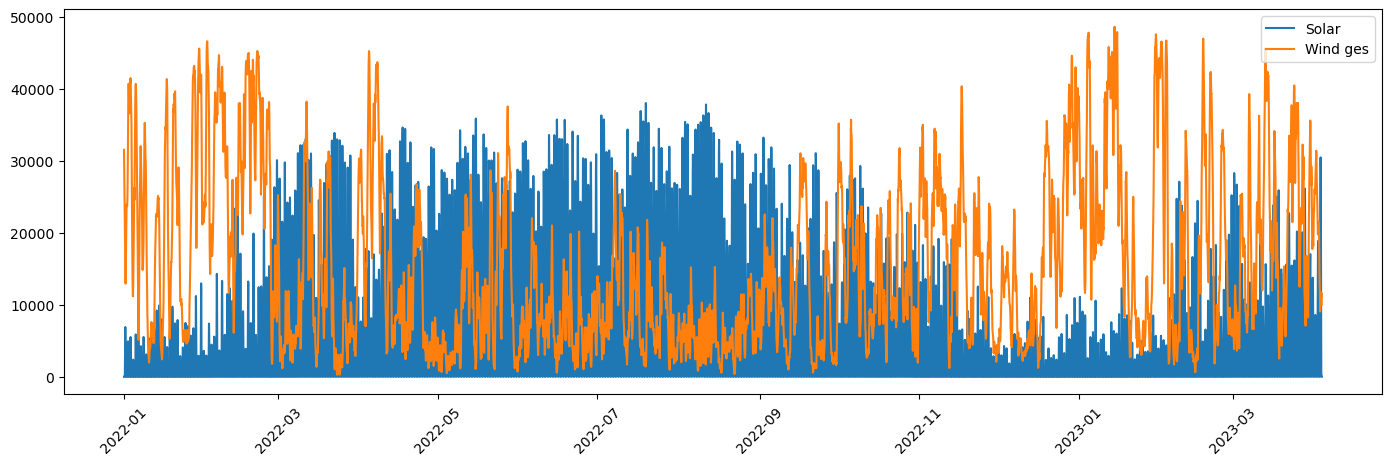

,Spot,Demand,Solar,Wind,ResD
Spot,1.000000,0.081786,-0.003277,-0.579634,0.580079
Demand,0.081786,1.000000,0.318476,0.126720,0.356791
Solar,-0.003277,0.318476,1.000000,-0.245912,-0.254716
Wind,-0.579634,0.126720,-0.245912,1.000000,-0.640121
ResD,0.580079,0.356791,-0.254716,-0.640121,1.000000


In [17]:
#plt.figure(0, figsize=(17, 5))
#plt.xticks(rotation=45)
#plt.plot(spot)
#plt.legend(['Spot price'], loc='upper right')
#plt.show()

#plt.figure(1, figsize=(17, 5))
#plt.xticks(rotation=45)
#plt.ylabel('Demand MWh')
#plt.plot(demand)
#plt.legend(['Demand'], loc='upper right')
#plt.show()

#plt.figure(2, figsize=(17, 5))
#plt.xticks(rotation=45)
#plt.plot(wind_solar)
#plt.ylabel('Generation MWh')
#plt.legend(['Solar', 'Wind ges'], loc='upper right')
#plt.show()

#loads = spot.merge(demand, right_index=True, left_index=True).merge(wind_solar, right_index=True, left_index=True)
#loads = loads.assign(ResD=loads.Demand - loads.Wind - loads.Solar)
#loads.index = loads.index.tz_localize(None)

#loads.corr()

In [18]:
def getData(apiKey=rivapy.user_settings.entsoe_api_key, start='20220101', end=dt.datetime.strftime(pd.Timestamp.today(), format='%Y%m%d')):
    client = EntsoePandasClient(api_key=apiKey)

    start = pd.Timestamp(start, tz='Europe/Berlin')
    end = pd.Timestamp(end, tz='Europe/Berlin').round('D')
    country_code = 'DE_LU'

    spot = pd.DataFrame(client.query_day_ahead_prices(country_code, start=start, end=end))
    spot.index = [x.replace(tzinfo=pytz.UTC) for x in spot.index]
    spot.columns = ['Spot']

    demand = pd.DataFrame(client.query_load_forecast(country_code=country_code, start=start, end=end))
    demand.columns = ['Demand']
    demand = demand.assign(Datetime=[demand.index[x].replace(minute=0) for x in range(demand.shape[0])])
    demand = demand.groupby(['Datetime']).mean()
    demand.index = [x.replace(tzinfo=pytz.UTC) for x in demand.index]
    demand = demand.loc[demand.Demand <= 100000,:]

    wind_solar = client.query_wind_and_solar_forecast(country_code=country_code, start=start, end=end, psr_type=None)
    wind_solar = wind_solar.assign(Datetime=[wind_solar.index[x].replace(minute=0) for x in range(wind_solar.shape[0])])
    wind_solar = wind_solar.groupby(['Datetime']).mean()
    wind_solar = wind_solar.assign(Wind=wind_solar['Wind Offshore'] + wind_solar['Wind Onshore']).drop(['Wind Offshore', 'Wind Onshore'], axis=1)
    wind_solar.index = [x.replace(tzinfo=pytz.UTC) for x in wind_solar.index]

    loads = spot.merge(demand, right_index=True, left_index=True).merge(wind_solar, right_index=True, left_index=True)
    loads = loads.assign(ResD=loads.Demand - loads.Wind - loads.Solar)
    loads.index = loads.index.tz_localize(None)

    return loads

In [21]:
# data = getData()
data.loc[(data.index.hour >=8) & (data.index.hour <=20), ].corr()

# jährliche Korrelation anschauen
# in excel schreiben
# Unterschied expected & realized Demand + Erneuerbare

,Spot,Demand,Solar,Wind,ResD
Spot,1.000000,0.093928,-0.077076,-0.537284,0.567044
Demand,0.093928,1.000000,-0.087600,0.181655,0.415170
Solar,-0.077076,-0.087600,1.000000,-0.346975,-0.471259
Wind,-0.537284,0.181655,-0.346975,1.000000,-0.518181
ResD,0.567044,0.415170,-0.471259,-0.518181,1.000000
